The purpose of this notebook, adapted from the Geron text, is to understand more about RNN. For comparison, the same problem is run on a plain ANN.

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

[[ 0.3830425 ]
 [ 0.48214826]
 [ 0.55107456]
 [ 0.38334218]
 [ 0.2635741 ]
 [-0.07797168]
 [-0.31700435]
 [-0.55201274]
 [-0.5513847 ]
 [-0.55731124]
 [-0.43154365]
 [-0.32003698]
 [-0.20885201]
 [-0.18629822]
 [-0.21854784]
 [-0.1545761 ]
 [-0.126178  ]
 [ 0.03327407]
 [ 0.27152073]
 [ 0.51318014]
 [ 0.67549324]
 [ 0.7449252 ]
 [ 0.63308275]
 [ 0.44096994]
 [ 0.183976  ]
 [-0.03852959]
 [-0.17555712]
 [-0.18426707]
 [-0.17657368]
 [-0.20087776]
 [-0.27398306]
 [-0.3270961 ]
 [-0.5116111 ]
 [-0.56693053]
 [-0.6112097 ]
 [-0.48740855]
 [-0.19187461]
 [ 0.10372752]
 [ 0.32632717]
 [ 0.5285734 ]
 [ 0.5366235 ]
 [ 0.43175802]
 [ 0.3809303 ]
 [ 0.29913905]
 [ 0.26219827]
 [ 0.3004861 ]
 [ 0.32820207]
 [ 0.22323279]
 [ 0.1446138 ]
 [-0.0752892 ]]
[-0.34838444]


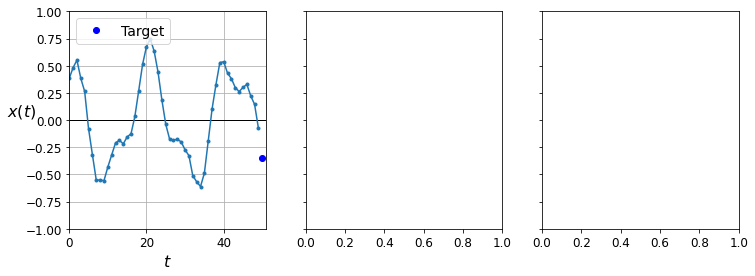

In [ ]:
# Output the first training time series

print(X_valid[0])
print(y_valid[0])

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(1):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
# save_fig("time_series_plot")
plt.show()

In [7]:
# Linear regression ANN

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.0000e+00 - val_loss: 0.0536 - val_accuracy: 0.0000e+00
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.0000e+00 - val_loss: 0.0275 - val_accuracy: 0.0000e+00
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.0000e+00 - val_loss: 0.0165 - val_accuracy: 0.0000e+00
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.0000e

In [ ]:
# A deeper ANN

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(20),
    keras.layers.Dense(20),
    keras.layers.Dense(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0700 - val_loss: 0.0101
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 6/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 10/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0035

In [ ]:
# A simple RNN

model = keras.models.Sequential([
  keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

np.random.seed(42)
tf.random.set_seed(42)

# optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 3s 10ms/step - loss: 0.2033 - val_loss: 0.1331
Epoch 2/10
219/219 [==============================] - 2s 9ms/step - loss: 0.1000 - val_loss: 0.0863
Epoch 3/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0747 - val_loss: 0.0694
Epoch 4/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0612 - val_loss: 0.0575
Epoch 5/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0516 - val_loss: 0.0489
Epoch 6/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0445 - val_loss: 0.0424
Epoch 7/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0391 - val_loss: 0.0374
Epoch 8/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0349 - val_loss: 0.0333
Epoch 9/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0314 - val_loss: 0.0301
Epoch 10/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0286 - val_loss: 0.027

In [ ]:
# A deeper RNN

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 9s 32ms/step - loss: 0.0492 - val_loss: 0.0090
Epoch 2/10
219/219 [==============================] - 7s 30ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 3/10
219/219 [==============================] - 7s 30ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 4/10
219/219 [==============================] - 7s 30ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 5/10
219/219 [==============================] - 7s 30ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 6/10
219/219 [==============================] - 6s 30ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/10
219/219 [==============================] - 7s 31ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 8/10
219/219 [==============================] - 7s 30ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 9/10
219/219 [==============================] - 7s 31ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 10/10
219/219 [==============================] - 7s 31ms/step - loss: 0.0035 - val_lo

In [ ]:
# Deeper RNN with a dense output

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 7s 23ms/step - loss: 0.0232 - val_loss: 0.0052
Epoch 2/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 4/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 6/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0030 - val_lo

In [ ]:
# An even deeper RNN

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 12s 43ms/step - loss: 0.0381 - val_loss: 0.0109
Epoch 2/10
219/219 [==============================] - 9s 40ms/step - loss: 0.0102 - val_loss: 0.0089
Epoch 3/10
219/219 [==============================] - 9s 40ms/step - loss: 0.0066 - val_loss: 0.0067
Epoch 4/10
219/219 [==============================] - 9s 40ms/step - loss: 0.0058 - val_loss: 0.0044
Epoch 5/10
219/219 [==============================] - 9s 40ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 6/10
219/219 [==============================] - 9s 39ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 7/10
219/219 [==============================] - 9s 40ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 8/10
219/219 [==============================] - 9s 40ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 9/10
219/219 [==============================] - 9s 39ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 10/10
219/219 [==============================] - 9s 39ms/step - loss: 0.0034 - val_l